In [1]:
from helpers import *
from create_album_jsons import *
import json
%load_ext autoreload
%autoreload 2

/Users/tugba/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
rankings = [
    {
        'album': 'Even in Arcadia',
        'artist': 'Sleep Token',
        'interlude_count': 0,
        'spotify_id': '1lS7FeRcSUuIGqyg99UGpj',
        'Yagiz': [1, 3, 0, 8, 5],
        'Tugba': [1, 3, 7, 0, 5],
        'date': '29.05.2025',
        'yagiz_score': 7.5,
        'tugba_score': 7.4,
    },
    {
        'album': 'The New Abnormal',
        'artist': 'The Strokes',
        'interlude_count': 0,
        'spotify_id': '2xkZV2Hl1Omi8rk2D7t5lN',
        'Yagiz': [0, 8, 6, 2, 1],
        'Tugba': [8, 1, 0, 2, 6],
        'date': '31.05.2025',
        'yagiz_score': 7.2,
        'tugba_score': 9.5,
    },

    {
        'album': 'BODIES',
        'artist': 'Thornhill',
        'interlude_count': 1,
        'spotify_id': '5bJeb7bvHrxNvZ6UskCoqm',
        'Yagiz': [1, 2, 10, 9, 5],
        'Tugba': [10, 2, 3, 5, 1],
        'date': '11.06.2025',
        'yagiz_score': 9.6,
        'tugba_score': 9.3,
    },

    {
        'album': 'Skinty Fia',
        'artist': 'Fontaines D.C.',
        'interlude_count': 0,
        'spotify_id': '0aVN6rMKthfuAdDXn8RTXf',
        'Yagiz': [8, 5, 0, 7, 3],
        'Tugba': [8, 3, 5, 1, 4],
        'date': '12.06.2025',
        'yagiz_score': 8.1,
        'tugba_score': 8.7,
    },
    {
        'album': 'Radiant Dark',
        'artist': 'If I Were You',
        'interlude_count': 0,
        'spotify_id': '2qGyywbFxucSBkPMPgfQ2w',
        'Yagiz': [5, 2, 9, 1, 0],
        'Tugba': [2, 4, 9, 5, 1],
        'date': '18.06.2025',
        'yagiz_score': 8.0,
        'tugba_score': 6.6,
    },
    {
        'album': 'Boxer',
        'artist': 'The National',
        'interlude_count': 0,
        'spotify_id': '2pG7mDkQhia2OyGE6fbkmJ',
        'Yagiz': [1, 5, 0, 6, 9],
        'Tugba': [1, 6, 0, 11, 5],
        'date': '24.06.2025',
        'yagiz_score': 6.5,
        'tugba_score': 7.0,
    },
    {
        'album': 'Take Me Back To Eden',
        'artist': 'Sleep Token',
        'interlude_count': 0,
        'spotify_id': '1gjugH97doz3HktiEjx2vY',
        'Yagiz': [7, 10, 9, 4, 0],
        'Tugba': [10, 7, 9, 0, 2],
        'date': '25.06.2025',
        'yagiz_score': 8.1,
        'tugba_score': 7.5,
    },
    {
        'album': 'Origin of Symmetry',
        'artist': 'Muse',
        'interlude_count': 0,
        'spotify_id': '1Dh27pjT3IEdiRG9Se5uQn',
        'Yagiz': [4, 0, 11, 9, 5],
        'Tugba': [4, 1, 5, 0, 2],
        'date': '02.07.2025',
        'yagiz_score': 6.7,
        'tugba_score': 7.2,
        'release_date': '18.06.2001',
    },
    {
        'album': 'Fatalism',
        'artist': 'Polaris',
        'interlude_count': 0,
        'spotify_id': '6yMmUKkAfVoHJT71ZpoBi5',
        'Yagiz': [5, 1, 7, 0, 4],
        'Tugba': [7, 4, 3, 0, 1],
        'date': '06.07.2025',
        'yagiz_score': 9.0,
        'tugba_score': 8.1,
    },
    {
        'album': 'Disintegration',
        'artist': 'The Cure',
        'interlude_count': 0,
        'spotify_id': '6DZNOsLXIU2zOQfQDwDpIS',
        'Yagiz': [5, 3, 6, 1, 9],
        'Tugba': [3, 9, 5, 1, 4],
        'date': '09.07.2025',
        'yagiz_score': 7.1,
        'tugba_score': 8.3,
    },
    {
        'album': 'The Silver Scream',
        'artist': 'Ice Nine Kills',
        'interlude_count': 0,
        'spotify_id': '3DVjLNjzyZBVc8eZcJoulz',
        'Yagiz': [2, 12, 6, 7, 0],
        'Tugba': [5, 2, 12, 0, 11],
        'date': '13.07.2025',
        'yagiz_score': 9.1,
        'tugba_score': 9.0,
    },
    {
        'album': "(What's the Story) Morning Glory?",
        'artist': 'Oasis',
        'interlude_count': 2,
        'spotify_id': '6Srtm8a14PDdrpRUdvUdEO',
        'Yagiz': [11, 3, 2, 9, 1],
        'Tugba': [11, 3, 2, 9, 6],
        'date': '23.07.2025',
        'yagiz_score': 7.5,
        'tugba_score': 8.8,
    },
    
    {
        'album': "Stargazer",
        'artist': 'Moodring',
        'interlude_count': 1,
        'spotify_id': '6xKM5VYZoDt0H0mPu2Blru',
        'Yagiz': [10, 6, 9, 1, 8],
        'Tugba': [1, 4, 5, 7, 2],
        'date': '29.07.2025',
        'yagiz_score': 8.3,
        'tugba_score': 8.4,
    },
    {
        'album': "Humbug",
        'artist': 'Arctic Monkeys',
        'interlude_count': 0,
        'spotify_id': '5IEoiwkThhRmSMBANhpxl2',
        'Yagiz': [1, 8, 2, 9, 0],
        'Tugba': [1, 8, 3, 7, 0],
        'date': '10.08.2025',
        'yagiz_score': 7.3,
        'tugba_score': 8.6,
    },
    {
        'album': "People Watching",
        'artist': '156/Silence',
        'interlude_count': 2,
        'spotify_id': '1PRvYCv9h0rlR4AP54yOnN',
        'Yagiz': [3, 1, 6, 8, 13],
        'Tugba': [4, 3, 7, 0, 13],
        'date': '17.08.2025',
        'yagiz_score': 8.3,
        'tugba_score': 7.6,
    },
    {
        'album': "X&Y",
        'artist': 'Coldplay',
        'interlude_count': 0,
        'spotify_id': '4E7bV0pzG0LciBSWTszra6',
        'Yagiz': [9, 1, 0, 6, 3],
        'Tugba': [3, 6, 4, 5, 0],
        'date': '24.08.2025',
        'yagiz_score': 7.8,
        'tugba_score': 9.4,
    },
    {
        'album': "Tsunami Sea",
        'artist': 'Spiritbox',
        'interlude_count': 0,
        'spotify_id': '79sg58t1vRpcxudpP9uPtg',
        'Yagiz': [6, 9, 8, 5, 2],
        'Tugba': [6, 2, 8, 9, 5],
        'date': '31.08.2025',
        'yagiz_score': 8.9,
        'tugba_score': 8.1,
    },
    {
        'album': "Songs for the Deaf",
        'artist': 'Queens of the Stone Age',
        'interlude_count': 0,
        'spotify_id': '4w3NeXtywU398NYW4903rY',
        'Yagiz': [1, 3, 4, 11, 7],
        'Tugba': [7, 4, 1, 13, 9],
        'date': '07.09.2025',
        'yagiz_score': 7.6,
        'tugba_score': 8.5,
    },
    {
        'album': "Hit It!",
        'artist': 'vianova',
        'interlude_count': 1,
        'spotify_id': '7jcC7erlgmd9QbhooPY4bt',
        'Yagiz': [5, 10, 1, 6, 0],
        'Tugba': [10, 1, 2, 8, 0],
        'date': '14.09.2025',
        'yagiz_score': 8.2,
        'tugba_score': 6.8,
    },
    {
        'album': "The Human Fear",
        'artist': 'Franz Ferdinand',
        'interlude_count': 0,
        'spotify_id': '7LbR1L8thzNldHceu3tj1a',
        'Yagiz': [5, 8, 4, 3, 10],
        'Tugba': [5, 0, 4, 8, 6],
        'date': '21.09.2025',
        'yagiz_score': 7.0,
        'tugba_score': 8.2,
    },
    {
        'album': "Melancholy",
        'artist': 'Shadow of Intent',
        'interlude_count': 0,
        'spotify_id': '5IgHVlikizQFBPieV1uk8v',
        'Yagiz': [9, 4, 1, 7, 6],
        'Tugba': [0, 4, 9, 1, 2],
        'date': '28.09.2025',
        'yagiz_score': 8.6,
        'tugba_score': 7.8,
    },
    {
        'album': "The Queen is Dead",
        'artist': 'The Smiths',
        'interlude_count': 0,
        'spotify_id': '5Y0p2XCgRRIjna91aQE8q7',
        'Yagiz': [3, 8, 5, 2, 1],
        'Tugba': [8, 3, 5, 2, 1],
        'date': '05.10.2025',
        'yagiz_score': 6.8,
        'tugba_score': 8.0,
    },
    {
        'album': "Remedy Lane",
        'artist': 'Pain of Salvation',
        'interlude_count': 1,
        'spotify_id': '5wdXBbdGH90qfKoWBErbdw',
        'Yagiz': [3, 5, 12, 6, 4],
        'Tugba': [6, 5, 7, 1, 12],
        'date': '12.10.2025',
        'yagiz_score': 8.6,
        'tugba_score': 8.5,
        'release_date': '15.01.2002',
    },
    {
        'album': "Lotus",
        'artist': 'Soen',
        'interlude_count': 0,
        'spotify_id': '16v3Ule2sTTWT37VKUsH6F',
        'Yagiz': [4, 5, 1, 7, 8],
        'Tugba': [3, 1, 4, 5, 7],
        'date': '26.10.2025',
        'yagiz_score': 8.0,
        'tugba_score': 7.9,
    },
    {
        'album': "Woe",
        'artist': 'An Abstract Illusion',
        'interlude_count': 0,
        'spotify_id': '6X8cqvrWfIjRf09pfcLECo',
        'Yagiz': [5, 2, 1, 6, 3],
        'Tugba': [5, 2, 1, 4, 6],
        'date': '02.11.2025',
        'yagiz_score': 8.8,
        'tugba_score': 7.1,
    },



]

ranking_df = pd.DataFrame(rankings)

In [3]:
ranking_loss_df = compute_ranking_losses_extended(ranking_df)
ranking_loss_df = extend_df_with_spotify(ranking_loss_df)

with open('baseline_loss_stats.json') as f:
    baseline_stats = json.load(f)
    
for col in ['y_vs_t', 'y_vs_s', 't_vs_s']:
    loss_col = f'loss_{col}'
    sim_col = f'similarity_{col}'
    ranking_loss_df[sim_col] = ranking_loss_df.apply(
        lambda row: compute_similarity_score(row[loss_col], baseline_stats, row['total_songs'] - row['interlude_count']), axis=1
    )
    
similarity_df = ranking_loss_df[[
    'album', 'artist', 'spotify_id', 'total_songs',
    'Yagiz', 'Tugba', 'Spotify', 'release_date',
    'similarity_y_vs_t', 'similarity_y_vs_s', 'similarity_t_vs_s'
]]

similarity_df

,album,artist,spotify_id,total_songs,Yagiz,Tugba,Spotify,release_date,similarity_y_vs_t,similarity_y_vs_s,similarity_t_vs_s
0,Even in Arcadia,Sleep Token,1lS7FeRcSUuIGqyg99UGpj,10,"[1, 3, 0, 8, 5]","[1, 3, 7, 0, 5]","[4, 1, 3, 7, 8]",09.05.2025,2.268469,0.968071,1.228151
1,The New Abnormal,The Strokes,2xkZV2Hl1Omi8rk2D7t5lN,9,"[0, 8, 6, 2, 1]","[8, 1, 0, 2, 6]","[0, 1, 8, 6, 2]",10.04.2020,1.889631,2.177880,2.177880
2,BODIES,Thornhill,5bJeb7bvHrxNvZ6UskCoqm,11,"[1, 2, 10, 9, 5]","[10, 2, 3, 5, 1]","[7, 5, 2, 1, 6]",04.04.2025,1.488231,0.447912,0.447912
3,Skinty Fia,Fontaines D.C.,0aVN6rMKthfuAdDXn8RTXf,10,"[8, 5, 0, 7, 3]","[8, 3, 5, 1, 4]","[8, 5, 3, 1, 7]",22.04.2022,1.228151,2.008390,2.528549
4,Radiant Dark,If I Were You,2qGyywbFxucSBkPMPgfQ2w,10,"[5, 2, 9, 1, 0]","[2, 4, 9, 5, 1]","[2, 3, 4, 0, 1]",17.07.2020,1.748310,0.447912,1.228151
5,Boxer,The National,2pG7mDkQhia2OyGE6fbkmJ,12,"[1, 5, 0, 6, 9]","[1, 6, 0, 11, 5]","[0, 1, 2, 3, 4]",21.05.2007,2.217908,0.601138,0.601138
6,Take Me Back To Eden,Sleep Token,1gjugH97doz3HktiEjx2vY,12,"[7, 10, 9, 4, 0]","[10, 7, 9, 0, 2]","[1, 10, 9, 2, 0]",19.05.2023,2.448875,1.294039,1.755973
7,Origin of Symmetry,Muse,1Dh27pjT3IEdiRG9Se5uQn,12,"[4, 0, 11, 9, 5]","[4, 1, 5, 0, 2]","[4, 9, 0, 1, 2]",18.06.2001,1.294039,1.755973,1.986940
8,Fatalism,Polaris,6yMmUKkAfVoHJT71ZpoBi5,11,"[5, 1, 7, 0, 4]","[7, 4, 3, 0, 1]","[7, 1, 5, 0, 3]",01.09.2023,1.146307,2.358523,1.631193
9,Disintegration,The Cure,6DZNOsLXIU2zOQfQDwDpIS,12,"[5, 3, 6, 1, 9]","[3, 9, 5, 1, 4]","[1, 3, 5, 7, 4]",02.05.1989,1.986940,1.525006,1.986940


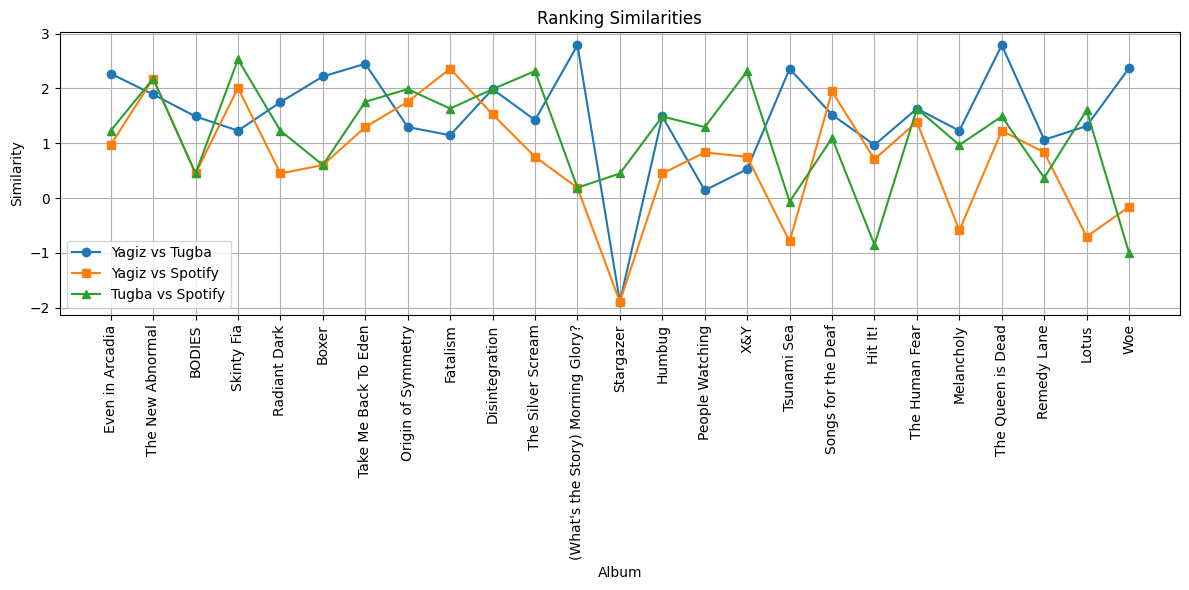

In [4]:
plot_all_ranking_similarities(similarity_df)

In [5]:
output = [
    {
        'album': row['album'],
        'artist': row['artist'],
        'spotify_id': row['spotify_id'],
        'Yagiz': row['Yagiz'],
        'Tugba': row['Tugba'],
        'Spotify': row['Spotify'],
        'similarity_y_vs_t': row['similarity_y_vs_t'],
        'similarity_y_vs_s': row['similarity_y_vs_s'],
        'similarity_t_vs_s': row['similarity_t_vs_s'],
        'total_songs': row['total_songs'],
        'date': row['date'],
        'release_date': row['release_date'],
        'yagiz_score': row['yagiz_score'],
        'tugba_score': row['tugba_score'],
        'mean_score': (row['yagiz_score'] + row['tugba_score']) / 2,
        'index': i
    }
    for i, row in ranking_loss_df.iterrows()
]

with open('albums.json', 'w') as f:
    json.dump(output, f, indent=2)

In [6]:
for _, row in ranking_loss_df.iterrows():
    generate_album_json(row, make_slug(row['album']))

Saved albums/even-in-arcadia.json
Saved albums/the-new-abnormal.json
Saved albums/bodies.json
Saved albums/skinty-fia.json
Saved albums/radiant-dark.json
Saved albums/boxer.json
Saved albums/take-me-back-to-eden.json
Saved albums/origin-of-symmetry.json
Saved albums/fatalism.json
Saved albums/disintegration.json
Saved albums/the-silver-scream.json
Saved albums/whats-the-story-morning-glory.json
Saved albums/stargazer.json
Saved albums/humbug.json
Saved albums/people-watching.json
Saved albums/xy.json
Saved albums/tsunami-sea.json
Saved albums/songs-for-the-deaf.json
Saved albums/hit-it.json
Saved albums/the-human-fear.json
Saved albums/melancholy.json
Saved albums/the-queen-is-dead.json
Saved albums/remedy-lane.json
Saved albums/lotus.json
Saved albums/woe.json
